In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = 'datos_iniciales_anonimizados.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para inspeccionar la estructura del archivo
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   deployments            89 non-null     object 
 1   CPU_REQUESTS           77 non-null     float64
 2   MEMORY_REQUESTS_in_MB  77 non-null     float64
 3   MEMORY_LIMITS          77 non-null     float64
 4   CPU_95                 88 non-null     float64
 5   Memory_95              88 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.3+ KB


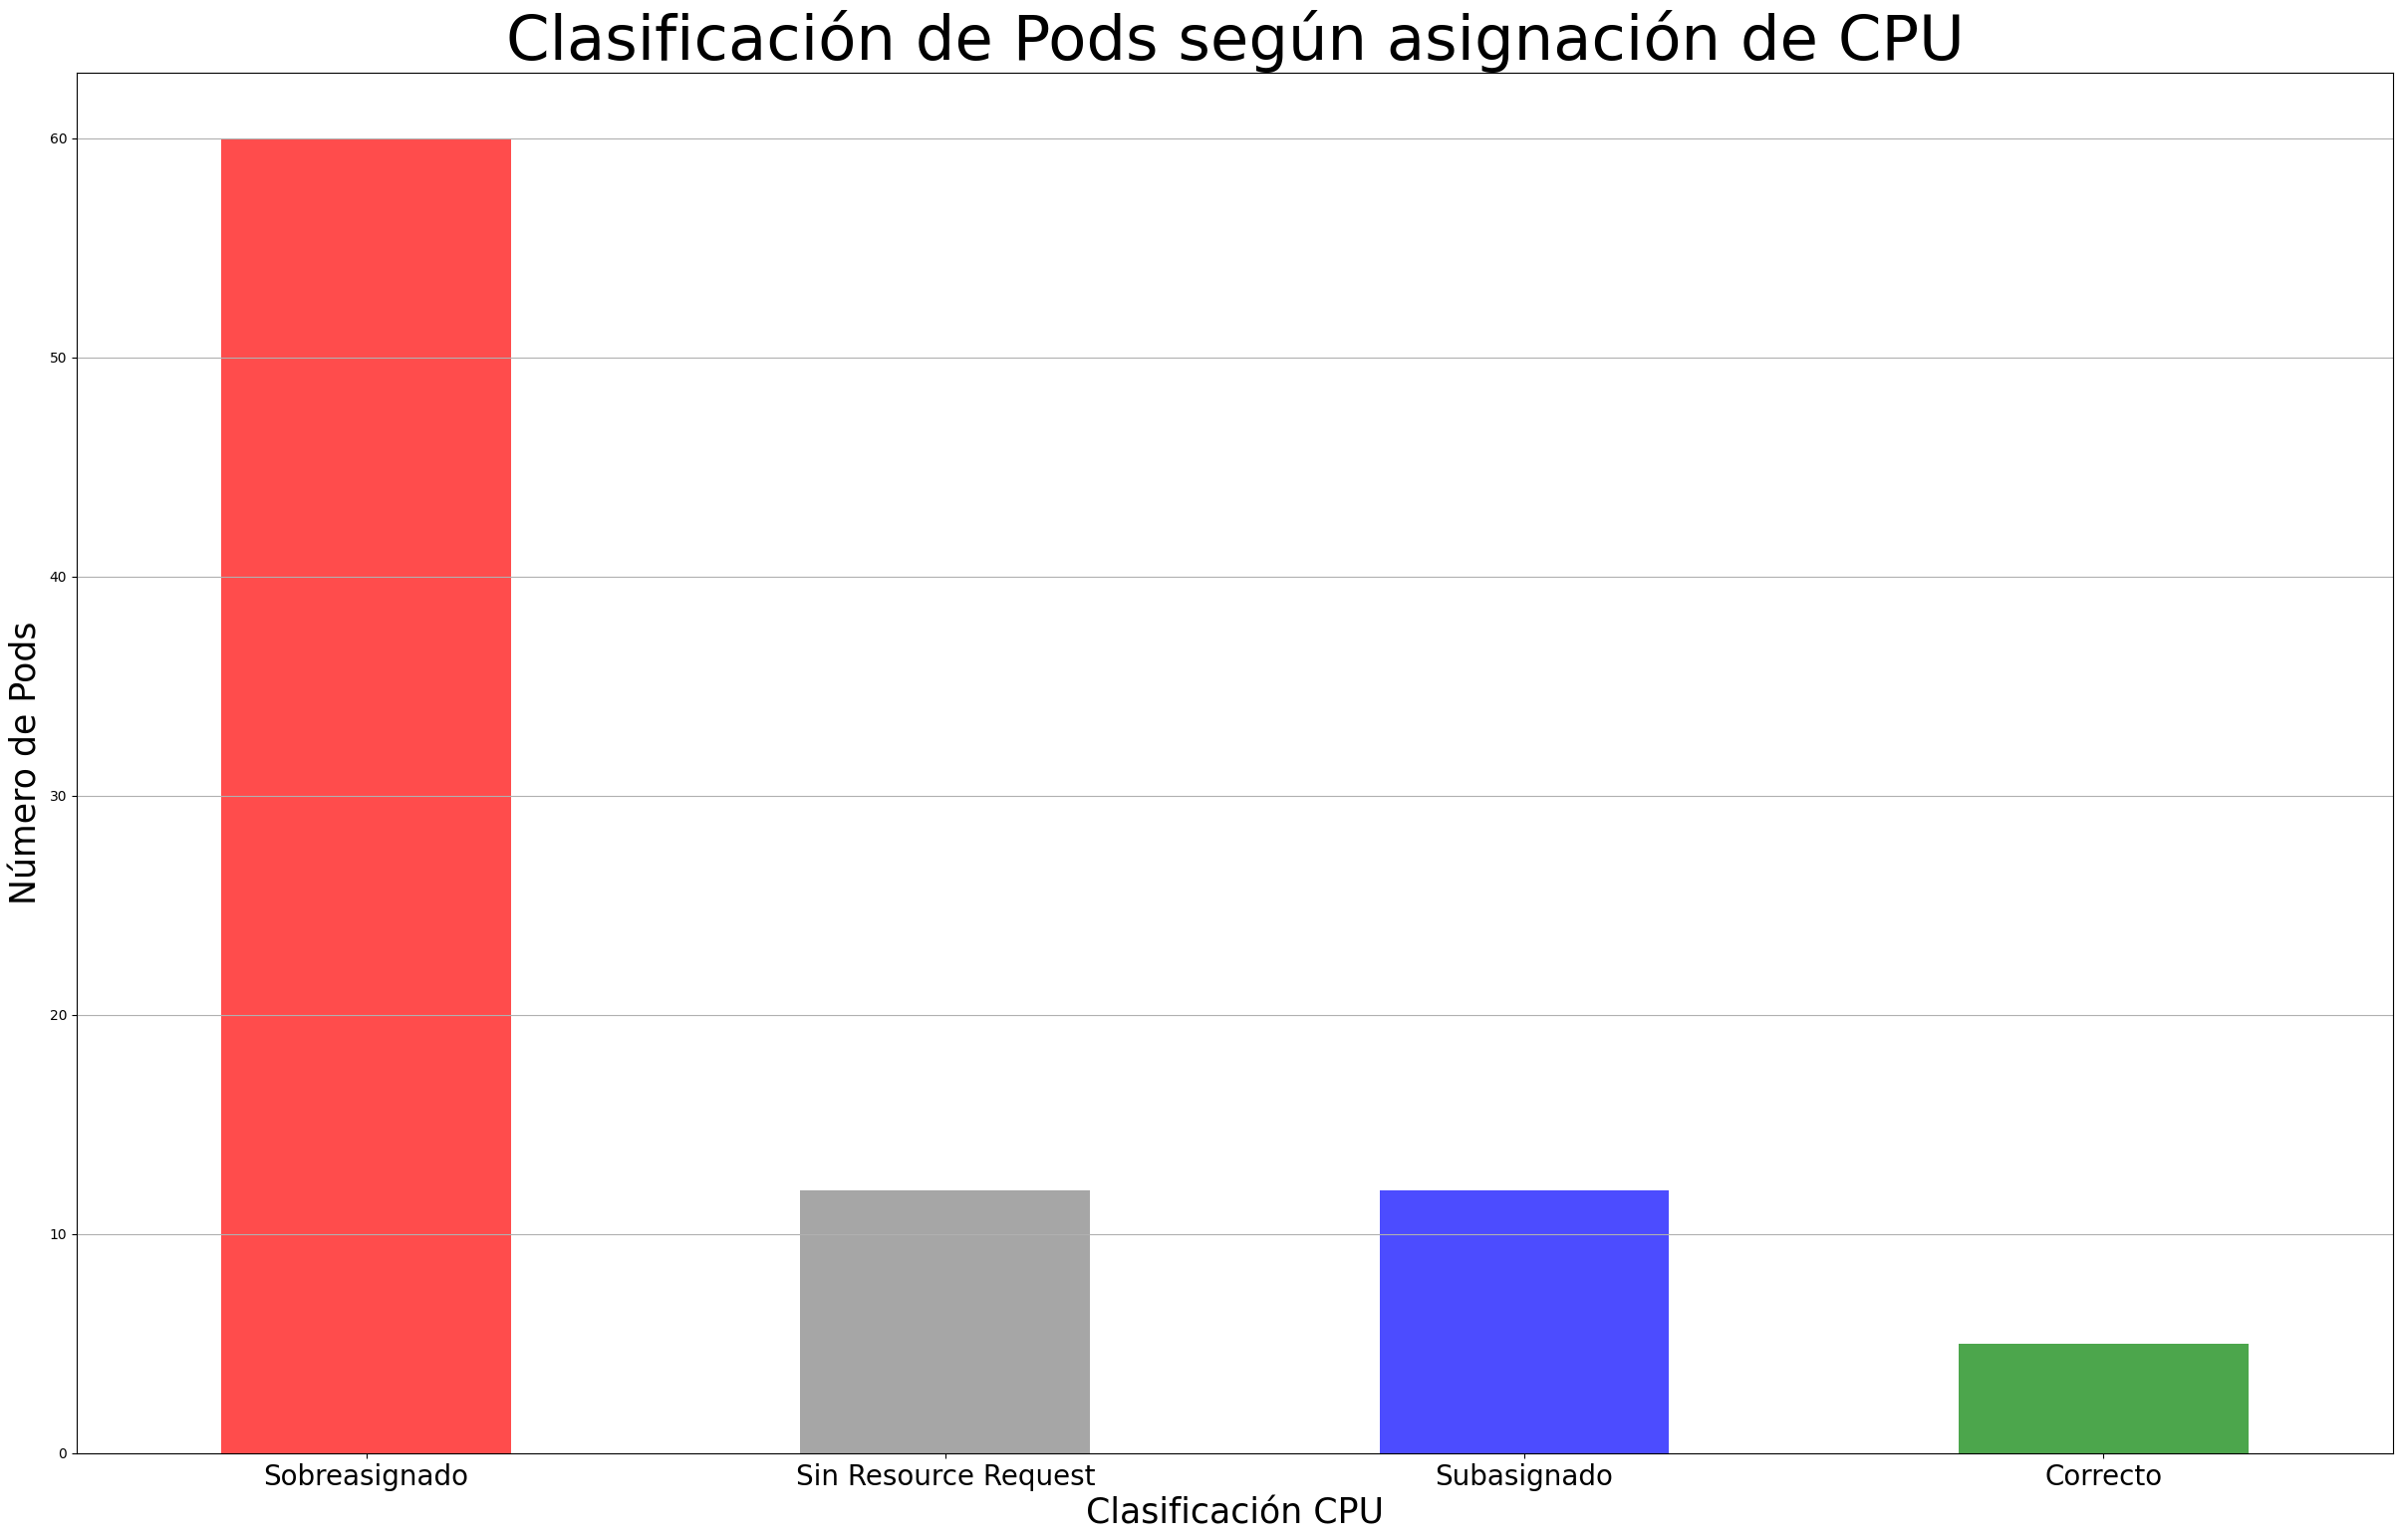

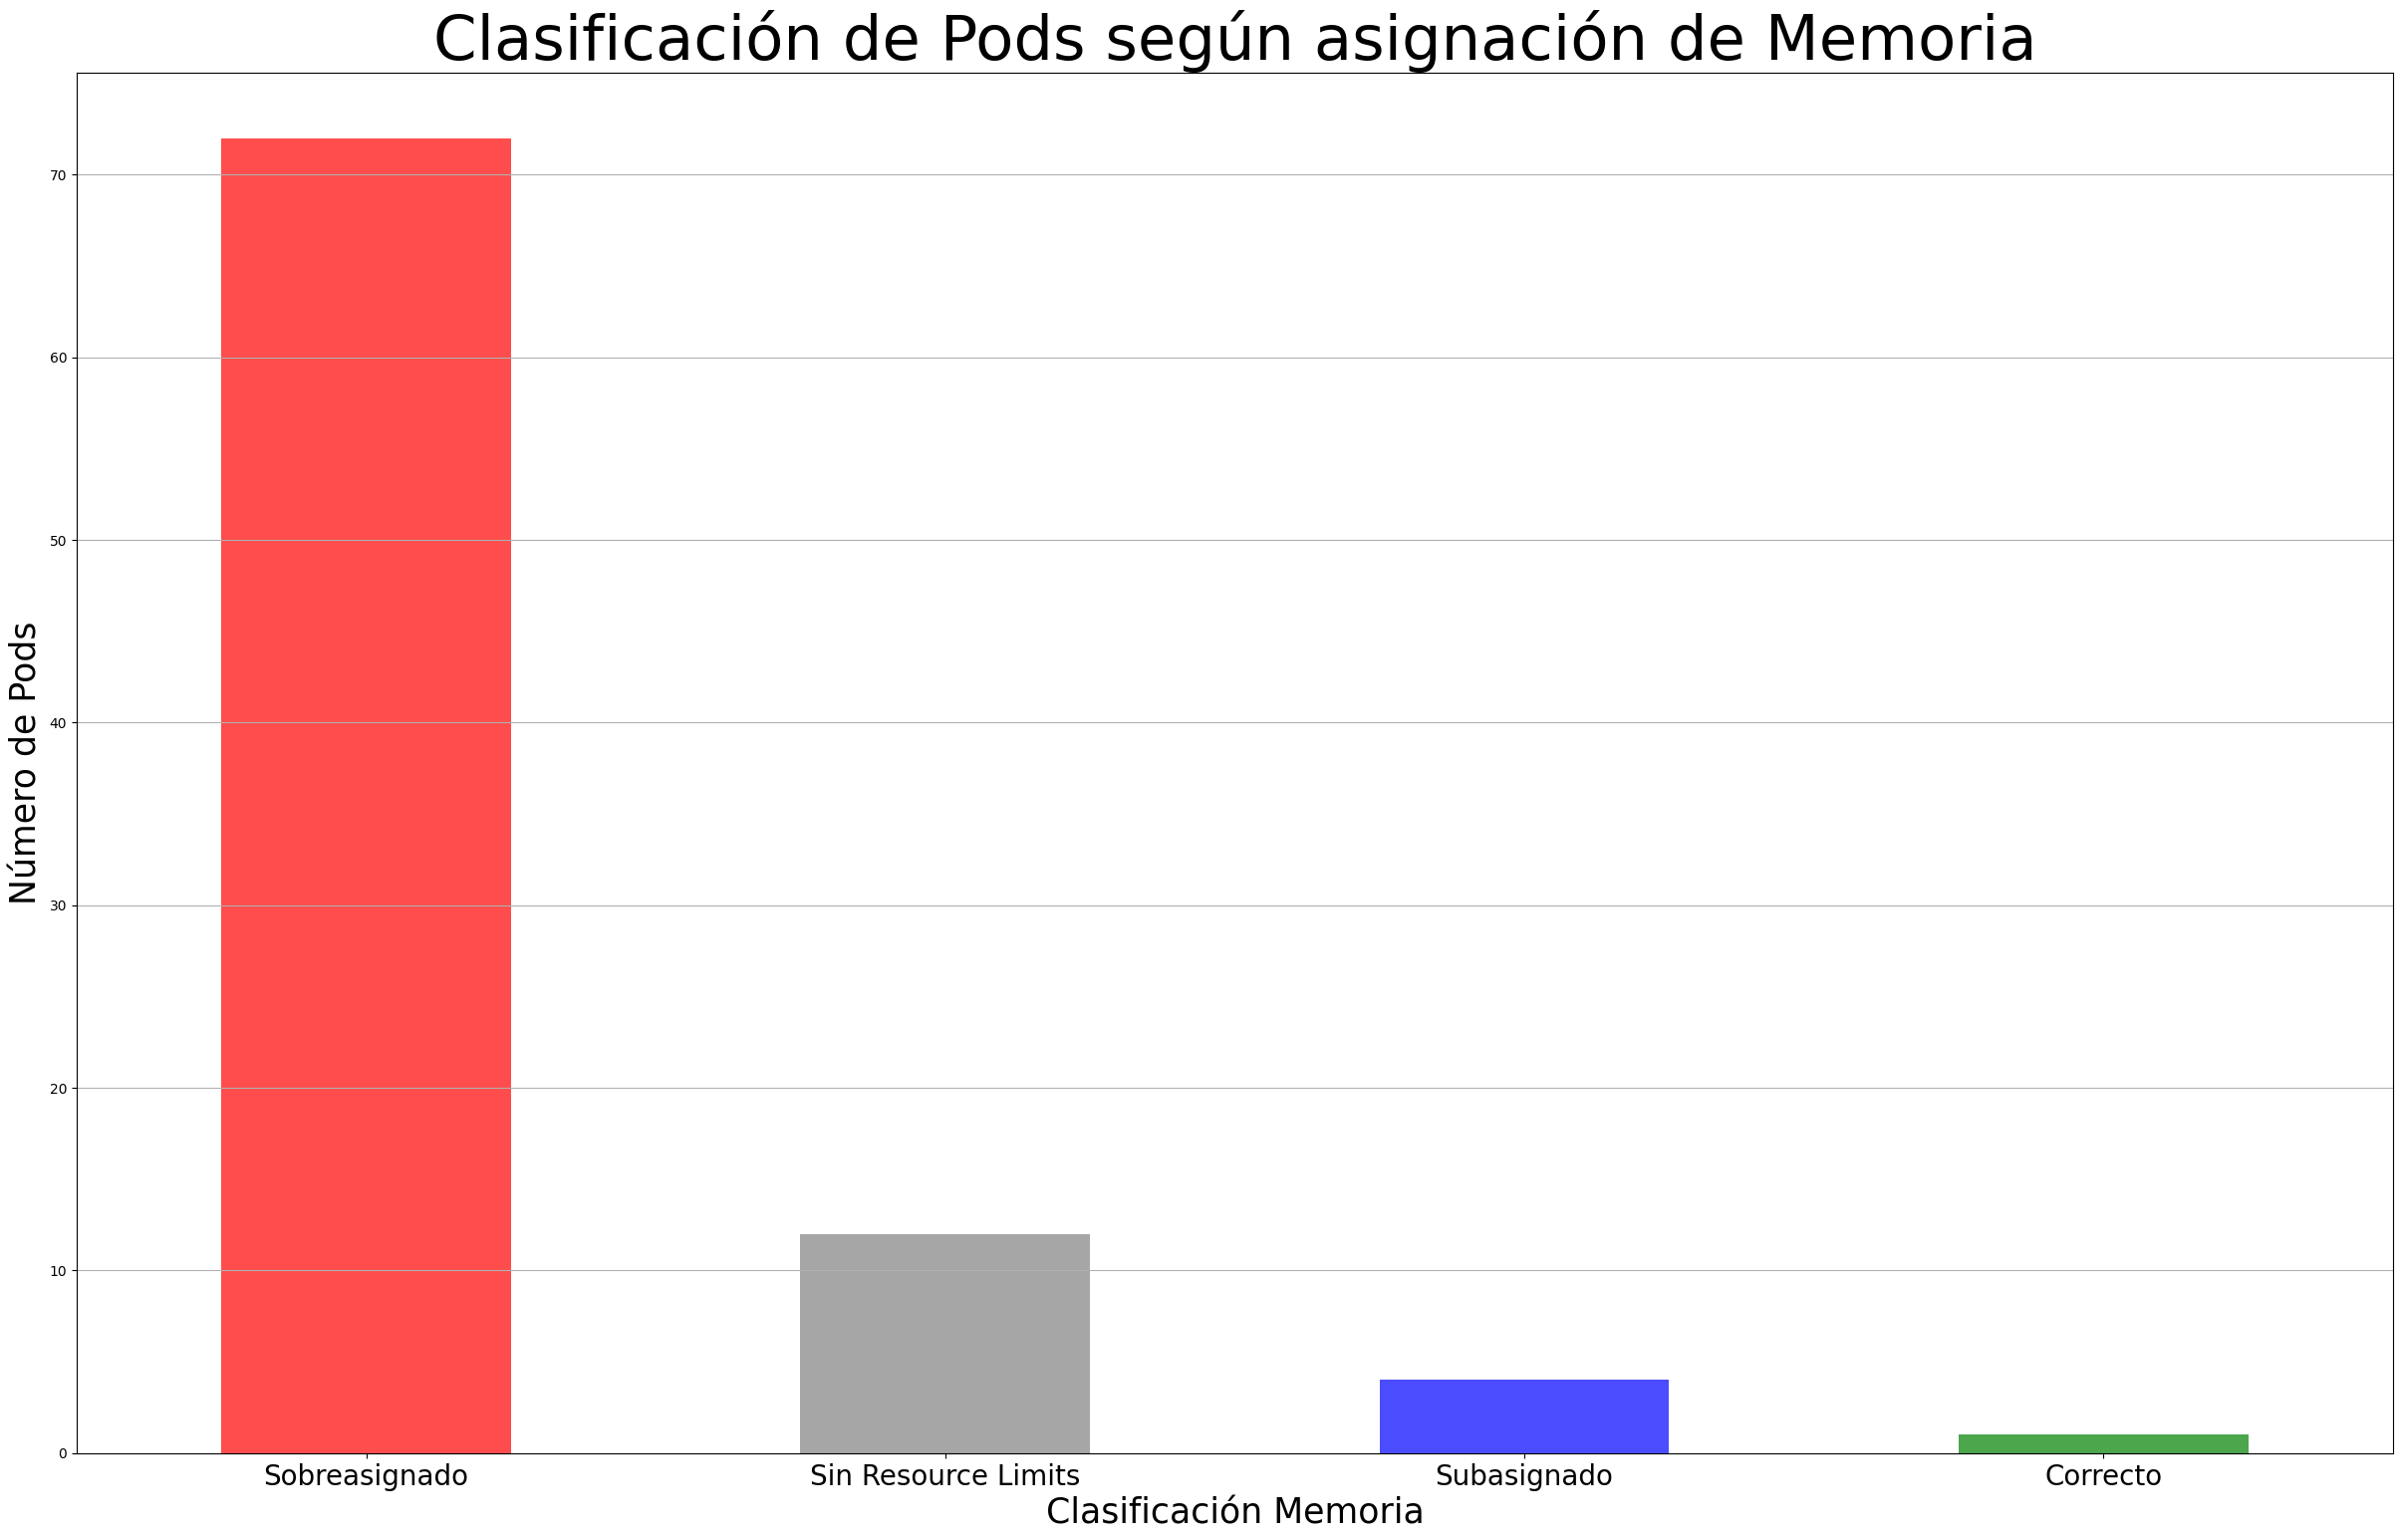

In [3]:
# Configurar el tamaño general de los gráficos
plt.rcParams['figure.figsize'] = (30, 18)

fuente_titulo=45
fuente_labels=25

# Clasificación adicional para Pods sin requests o limits definidos
data['Clasificación_CPU'] = 'Correcto'
data['Clasificación_Memoria'] = 'Correcto'

# Para CPU
data.loc[data['CPU_REQUESTS'].isna(), 'Clasificación_CPU'] = 'Sin Resource Request'
data.loc[data['CPU_REQUESTS'] < data['CPU_95'], 'Clasificación_CPU'] = 'Subasignado'
data.loc[data['CPU_REQUESTS'] > data['CPU_95'] * 1.15, 'Clasificación_CPU'] = 'Sobreasignado'

# Para Memoria
data.loc[data['MEMORY_REQUESTS_in_MB'].isna(), 'Clasificación_Memoria'] = 'Sin Resource Request'
data.loc[data['MEMORY_REQUESTS_in_MB'] < data['Memory_95'], 'Clasificación_Memoria'] = 'Subasignado'
data.loc[data['MEMORY_LIMITS'].isna(), 'Clasificación_Memoria'] = 'Sin Resource Limits'
data.loc[data['MEMORY_LIMITS'] > data['Memory_95'] * 1.15, 'Clasificación_Memoria'] = 'Sobreasignado'

# Gráfico para clasificación de CPU
clasificación_cpu_counts = data['Clasificación_CPU'].value_counts()
clasificación_cpu_counts.plot(kind='bar', color=['red', 'gray', 'blue', 'green'], alpha=0.7)
plt.xlabel('Clasificación CPU', fontsize=fuente_labels)
plt.ylabel('Número de Pods',fontsize=fuente_labels)
plt.title('Clasificación de Pods según asignación de CPU',fontsize=fuente_titulo)
plt.xticks(rotation=0, fontsize=20)
plt.grid(axis='y')
plt.show()

# Gráfico para clasificación de Memoria
clasificación_memoria_counts = data['Clasificación_Memoria'].value_counts()
clasificación_memoria_counts.plot(kind='bar', color=['red', 'gray', 'blue', 'green'], alpha=0.7)
plt.xlabel('Clasificación Memoria', fontsize=fuente_labels)
plt.ylabel('Número de Pods', fontsize=fuente_labels)
plt.title('Clasificación de Pods según asignación de Memoria',fontsize=fuente_titulo)
plt.xticks(rotation=0, fontsize=20)
plt.grid(axis='y')
plt.show()



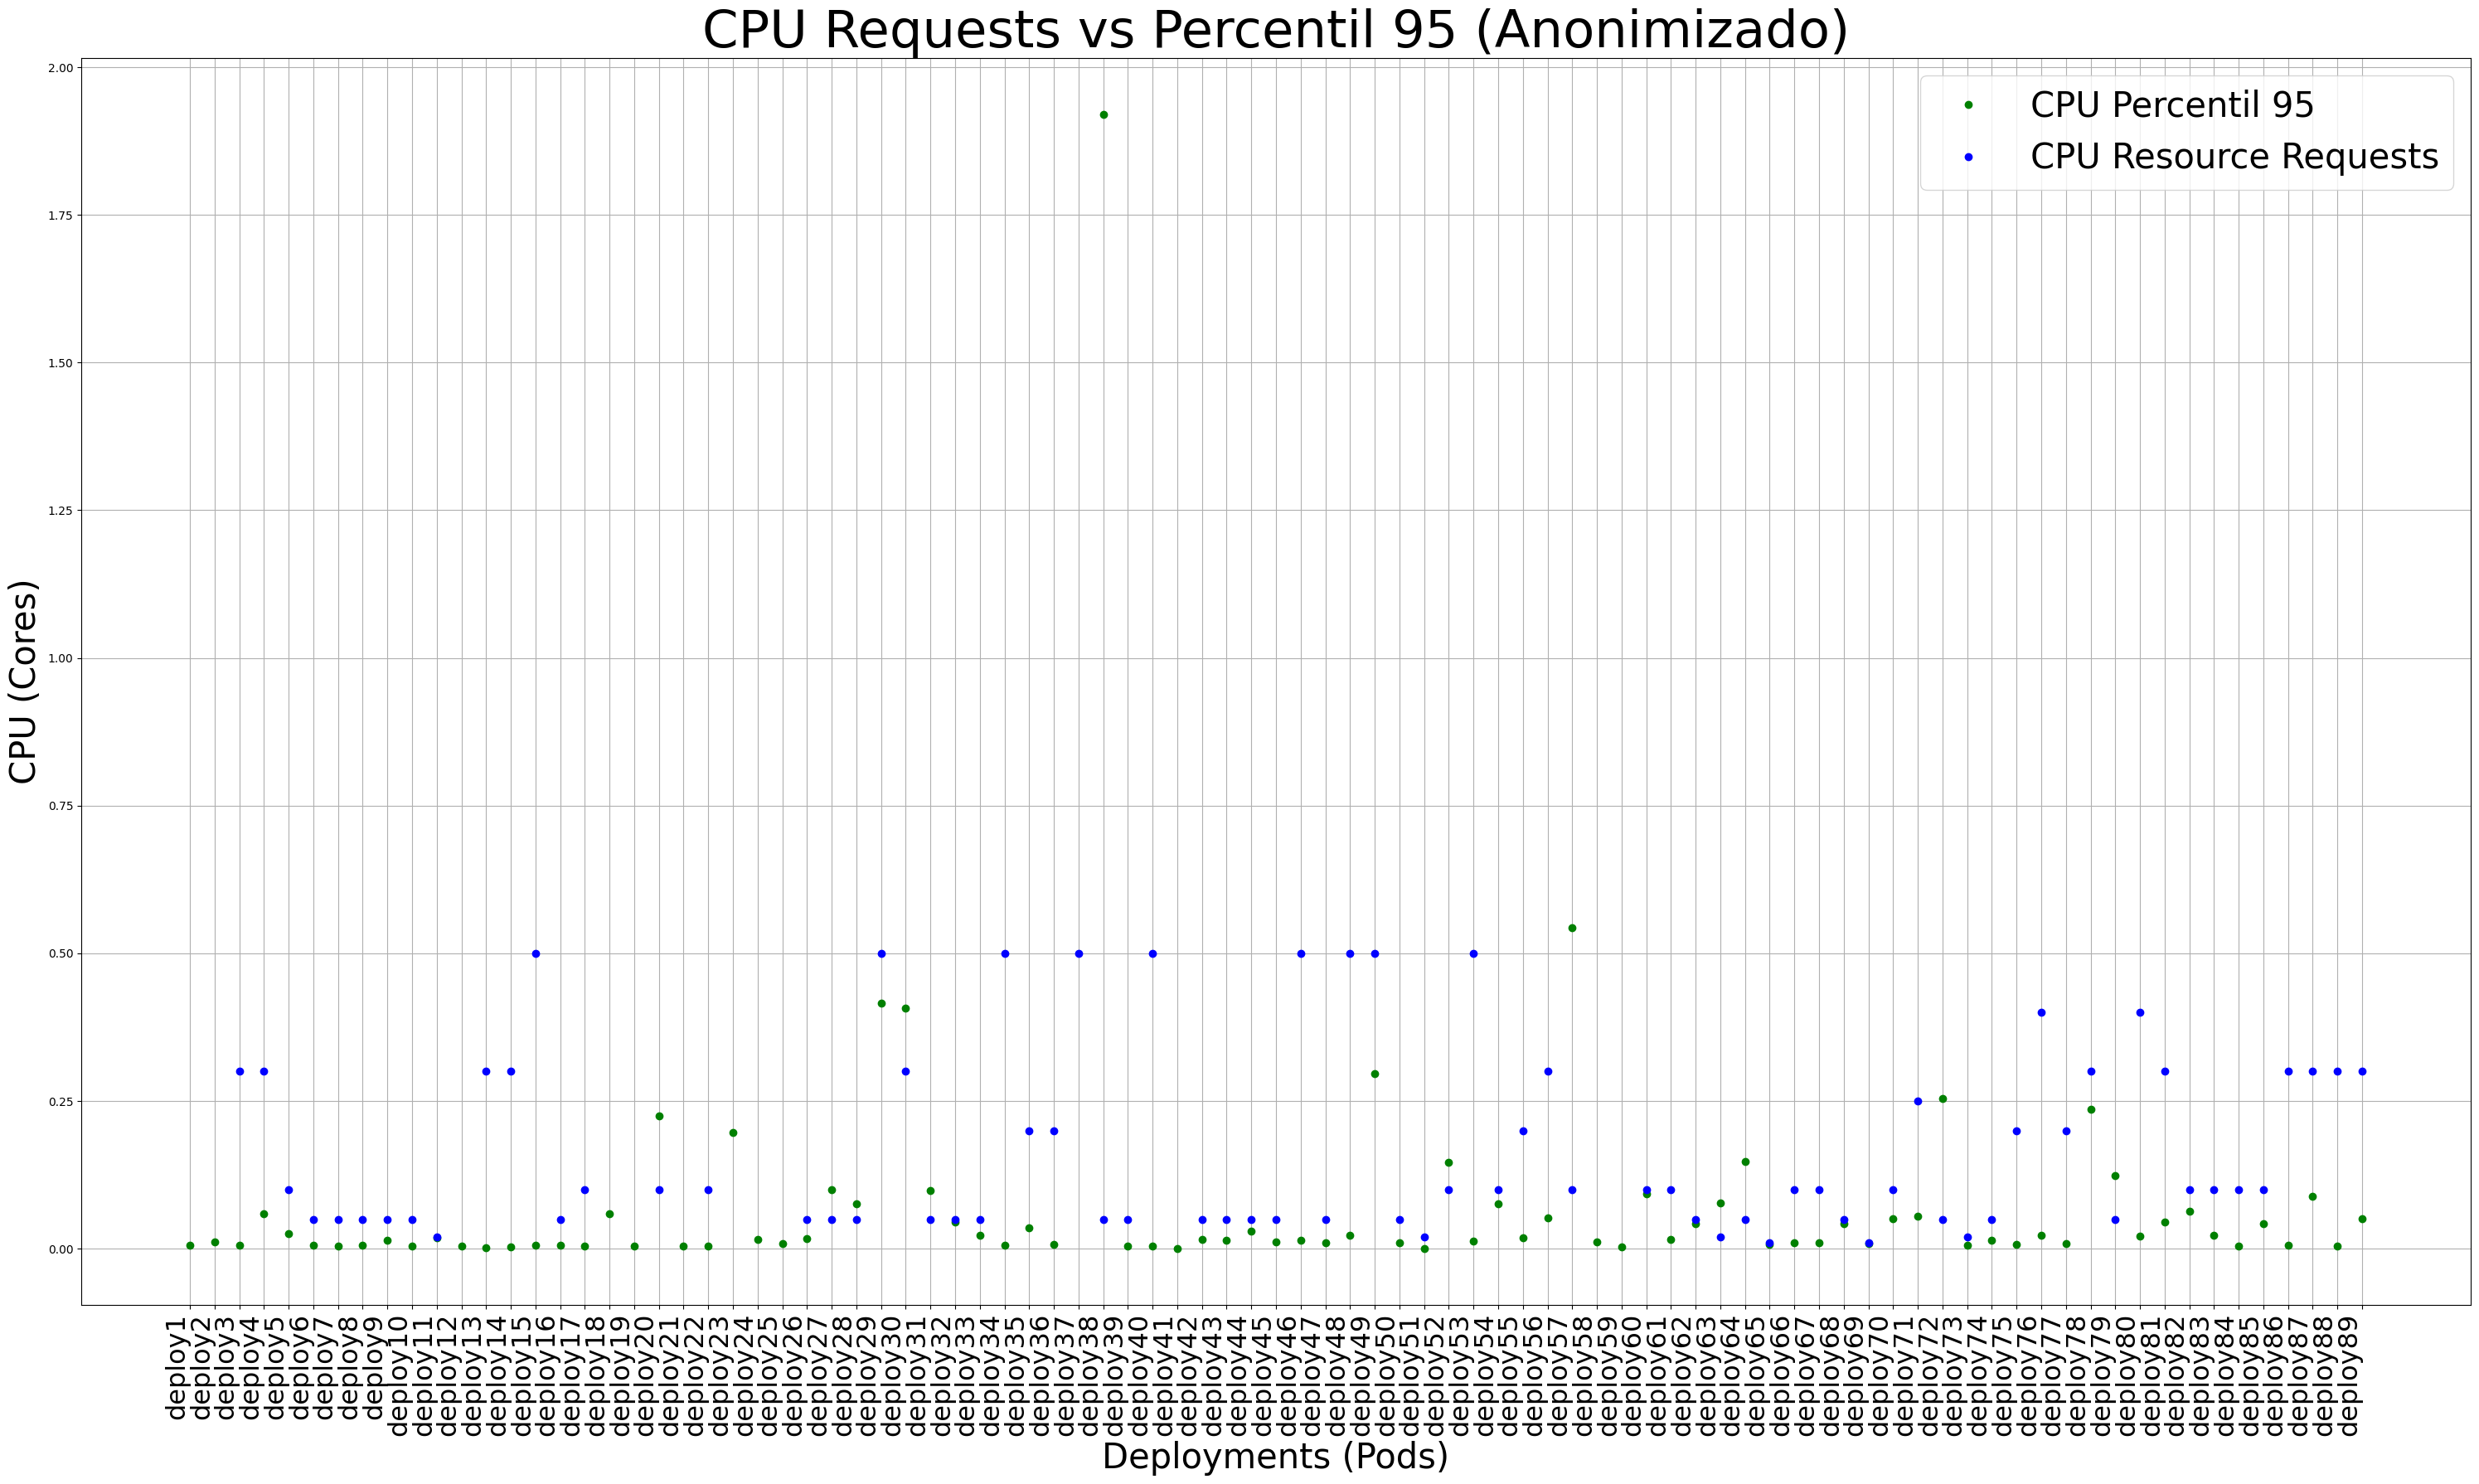

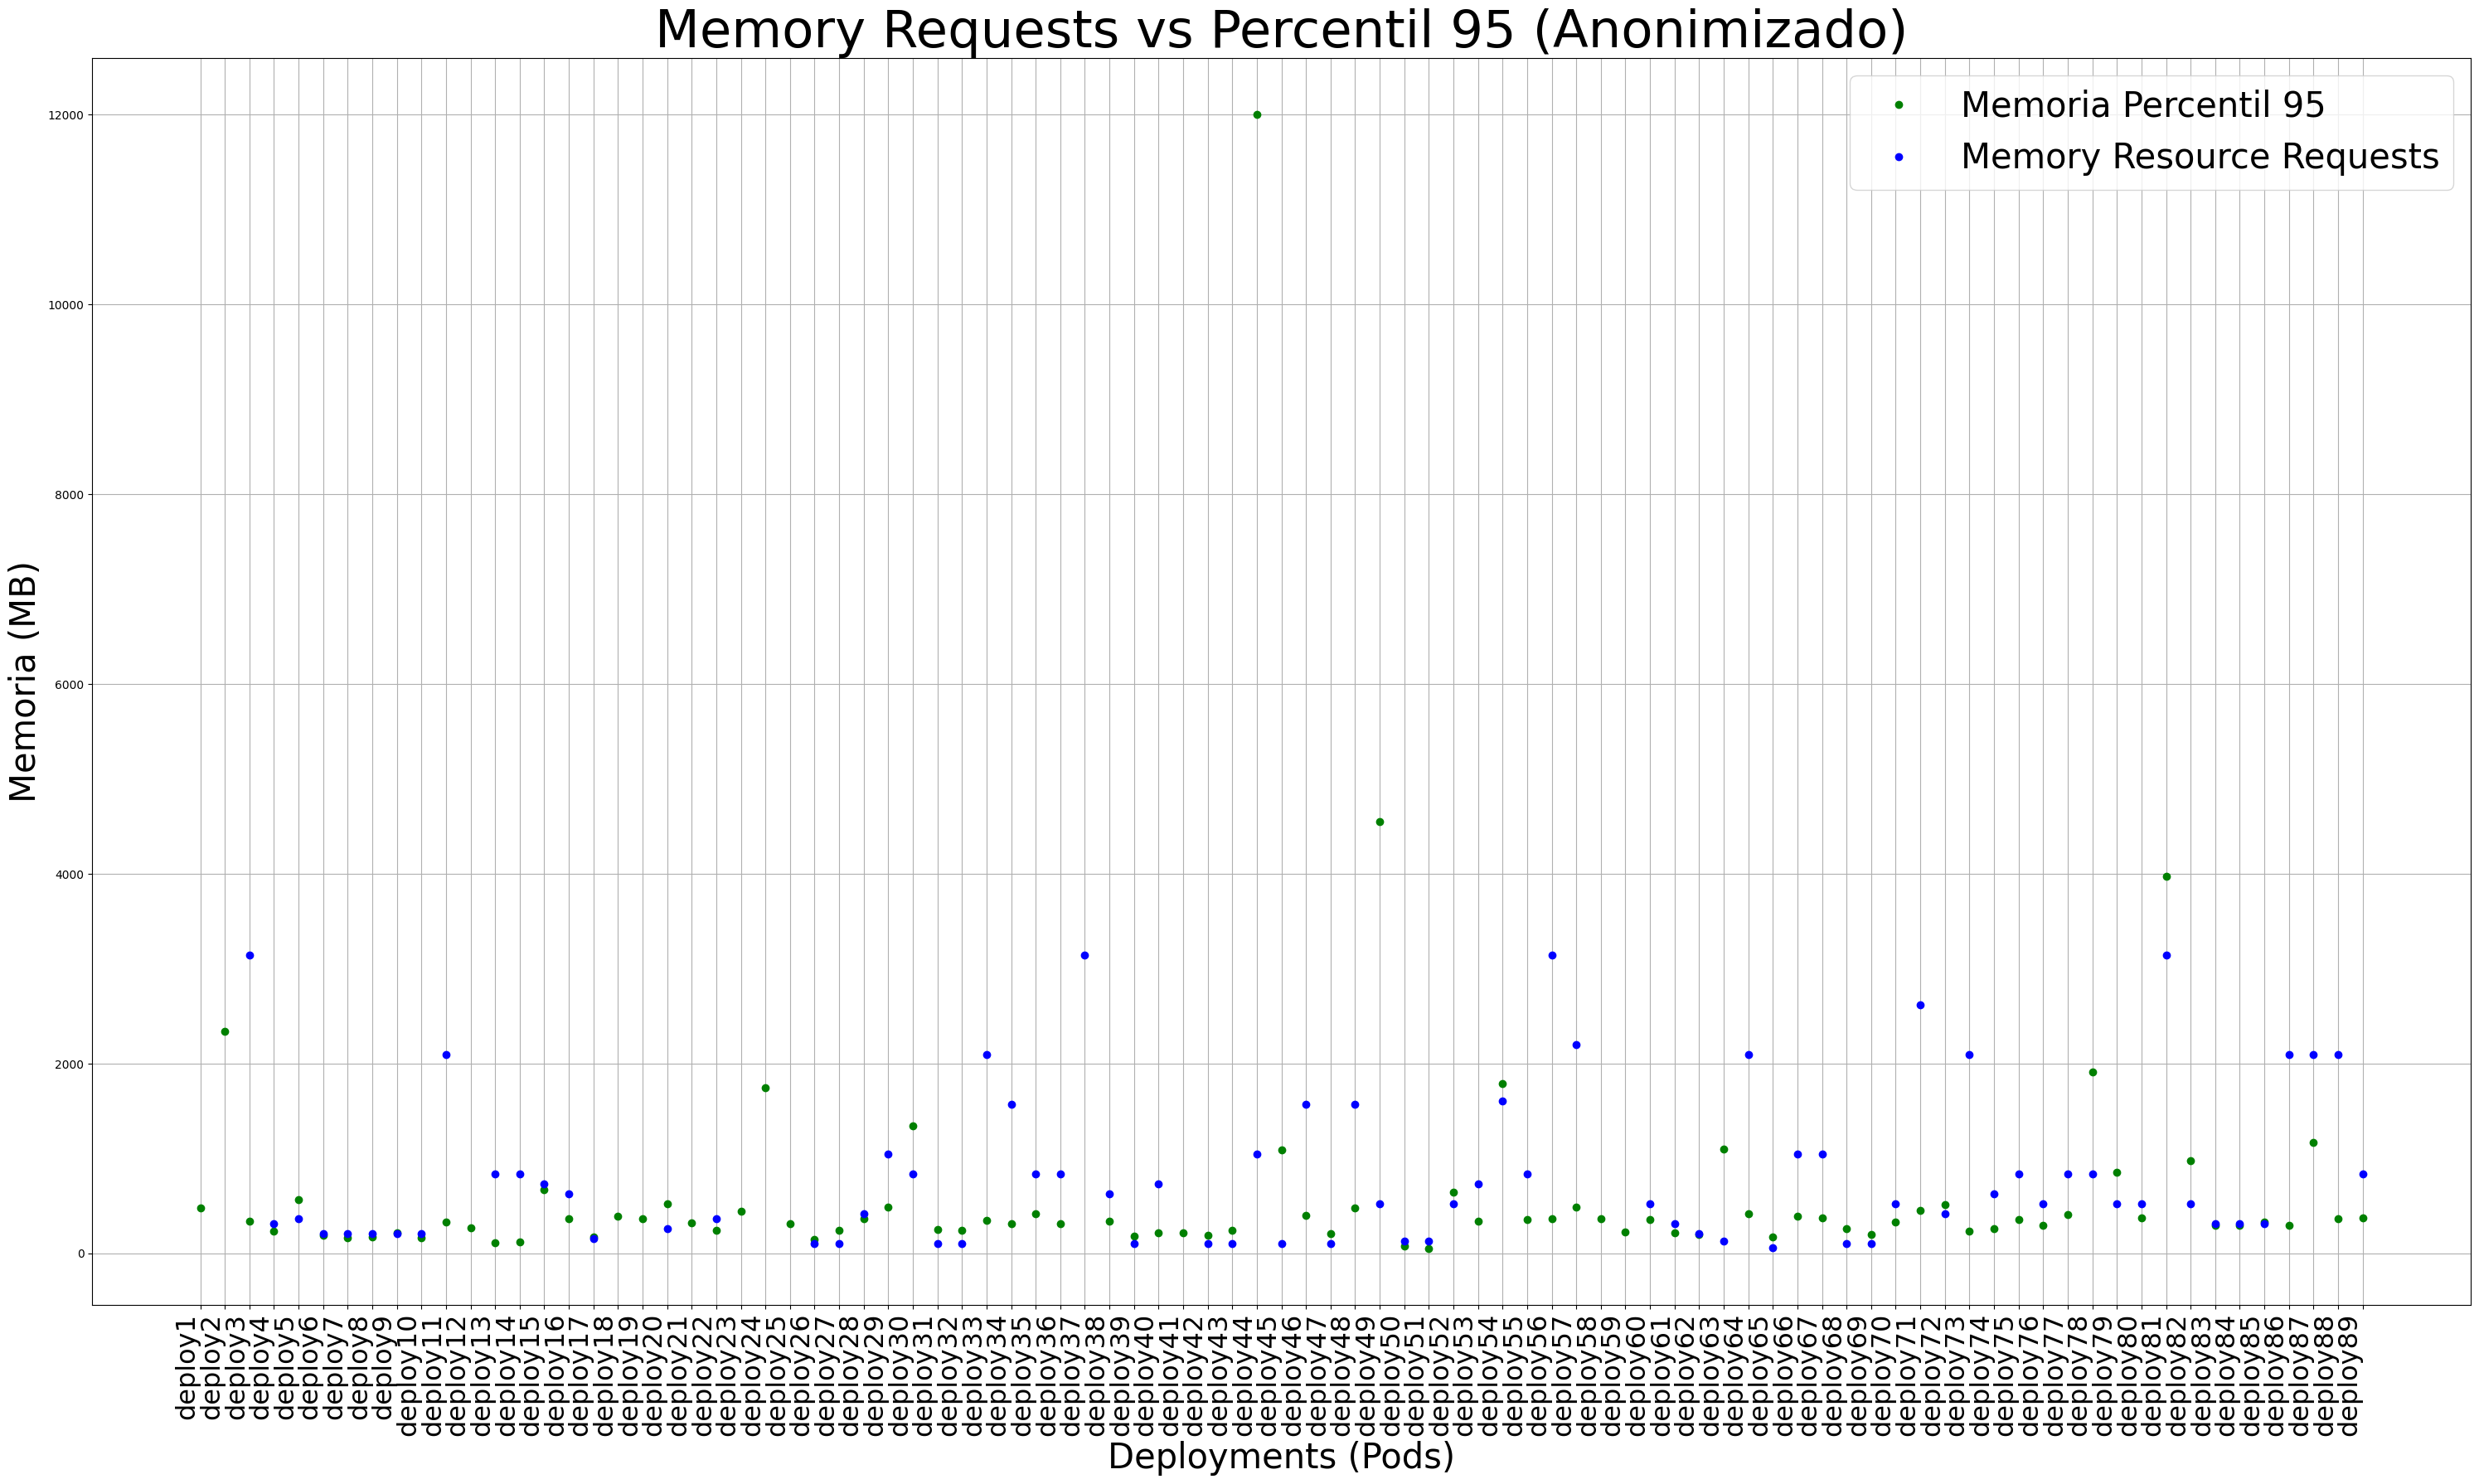

In [4]:

# Gráfico 1: CPU Percentil 95 y Resource Requests
plt.plot(data['deployments'], data['CPU_95'], 'go', label='CPU Percentil 95')  # Punto verde
plt.plot(data['deployments'], data['CPU_REQUESTS'], 'bo', label='CPU Resource Requests')  # Punto azul
plt.xlabel('Deployments (Pods)',fontsize=30)
plt.ylabel('CPU (Cores)',fontsize=30)
plt.title('CPU Requests vs Percentil 95 (Anonimizado)',fontsize=45)
plt.xticks(rotation=90, ha='right',fontsize=23)
plt.legend(fontsize=30)
plt.grid()
plt.tight_layout()
plt.show()

# Gráfico 2: Memoria Percentil 95 y Resource Requests
plt.plot(data['deployments'], data['Memory_95'], 'go', label='Memoria Percentil 95')  # Punto verde
plt.plot(data['deployments'], data['MEMORY_REQUESTS_in_MB'], 'bo', label='Memory Resource Requests')  # Punto azul
plt.xlabel('Deployments (Pods)',fontsize=30)
plt.ylabel('Memoria (MB)',fontsize=30)
plt.title('Memory Requests vs Percentil 95 (Anonimizado)',fontsize=45)
plt.xticks(rotation=90, ha='right',fontsize=23)
plt.legend(fontsize=30)
plt.grid()
plt.tight_layout()
plt.show()
